<a href="https://colab.research.google.com/github/soulaimane2/NLP_HelloWorld/blob/master/IMDB_Reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMDB_Dataset (text classification)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
(train_data, test_data),info = tfds.load('imdb_reviews/subwords8k',
                                         split=(tfds.Split.TRAIN,tfds.Split.TEST),
                                         with_info = True,
                                         as_supervised = True)

In [18]:
encoder = info.features['text'].encoder


In [19]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

In [20]:
encoder.vocab_size

8185

In [21]:
emb_dem = 15

# creating the model

model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size , emb_dem),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(15,activation='relu'),
                          layers.Dense(1)
])

In [23]:
model.compile(
    optimizer = 'adam',
    loss= keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [25]:
r = model.fit(
    train_batches,
    epochs = 10,
    validation_data=test_batches,
    validation_steps=20
)

Epoch 1/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.5210 - accuracy: 0.6844 - val_loss: 0.3927 - val_accuracy: 0.8600
Epoch 2/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.2951 - accuracy: 0.8778 - val_loss: 0.3021 - val_accuracy: 0.8750
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.2384 - accuracy: 0.9069 - val_loss: 0.3131 - val_accuracy: 0.8700
Epoch 4/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.2046 - accuracy: 0.9235 - val_loss: 0.3277 - val_accuracy: 0.8650
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1781 - accuracy: 0.9324 - val_loss: 0.3715 - val_accuracy: 0.8600
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1610 - accuracy: 0.9401 - val_loss: 0.3846 - val_accuracy: 0.8600
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1483 - accuracy: 0.9466 - val_loss: 0.3865 - val_accuracy

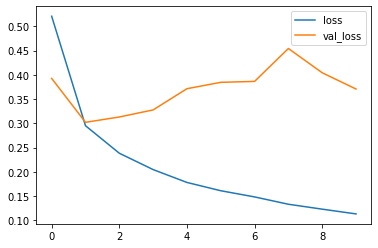

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

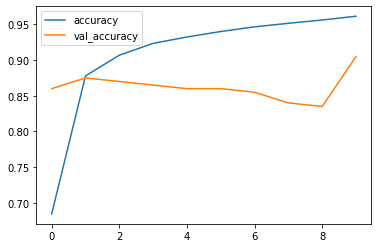

In [27]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [41]:
e = model.layers[0]
weights = e.get_weights()[0]

In [42]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

In [43]:
for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>